In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255) → (0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels (0–9 → [0,0,0,1,0,...])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Flatten image to 784 features
    Dense(128, activation="relu"),         # Hidden layer 1
    Dense(64, activation="relu"),          # Hidden layer 2
    Dense(10, activation="softmax")        # Output layer (10 classes)
])

# 3. Compile model
model.compile(optimizer="sgd",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 4. Train model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 5. Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4868 - loss: 1.7738 - val_accuracy: 0.8755 - val_loss: 0.6027
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8541 - loss: 0.5947 - val_accuracy: 0.9092 - val_loss: 0.3755
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8854 - loss: 0.4280 - val_accuracy: 0.9178 - val_loss: 0.3108
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8973 - loss: 0.3701 - val_accuracy: 0.9238 - val_loss: 0.2807
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9088 - loss: 0.3328 - val_accuracy: 0.9297 - val_loss: 0.2575
Test accuracy: 0.9191
Test loss: 0.2954


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy

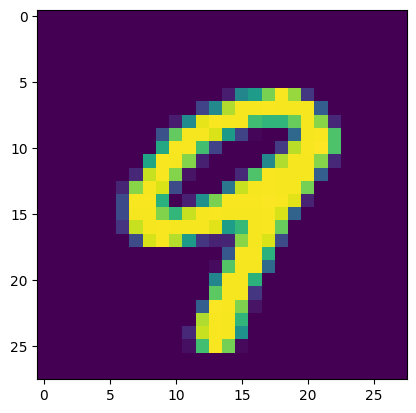

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: 9
True class: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
import numpy as np

# Pick random index
n = np.random.randint(0, len(x_test))

# Show the image
plt.imshow(x_test[n].squeeze())  # use cmap=gray for 1-channel images
plt.show()

# Expand dimensions to (1, height, width, channels)
image = np.expand_dims(x_test[n], axis=0)

# Predict
predicted_value = model.predict(image)

print("Predicted class:", np.argmax(predicted_value))
print("True class:", y_test[n])


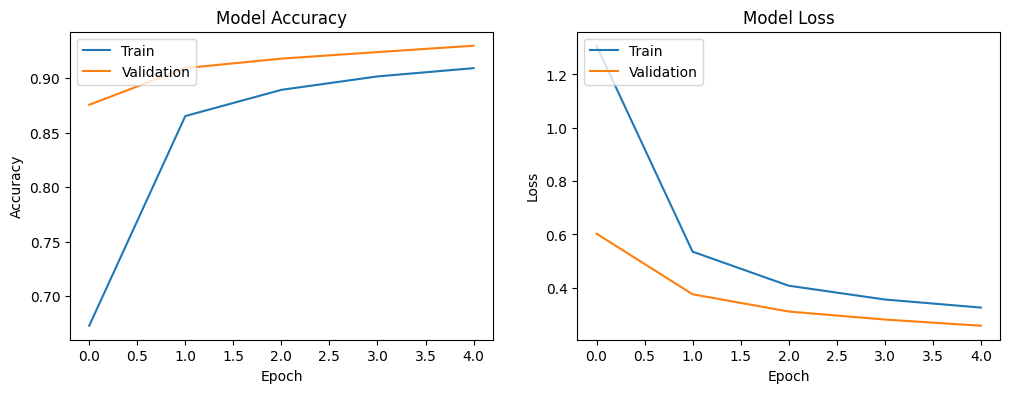

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()